<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-10' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [9]:
!pip install gpy

In [10]:
# https://medium.com/@lukei_3514/dealing-with-contractions-in-nlp-d6174300876b
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
!pip install contractions

In [11]:
import contractions

In [12]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [13]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The challenge is to predict the final price of each house.

## Training & Test Data

In [15]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

### Train dataset

In [16]:
# training dataset: 
# /content/drive/MyDrive/HousePrices/HousePrice_Test.csv
syntPath = "/content/drive/MyDrive/HousePrices/"
filename1 = "HousePrice_Train.csv"
filename2 = "HousePrice_Test.csv"
training_file = syntPath+filename1
# test dataset: 
testing_file = syntPath+filename2
# cost dataset: 
#cost_file = syntPath+filename3


In [17]:
dftrain = pd.read_csv(training_file)
dftest  = pd.read_csv(testing_file)

In [18]:
# show first data frame rows 
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [19]:
# Generate descriptive statistics
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


### Test dataset

In [20]:
# show first data frame rows 
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [21]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


In [22]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1638 non-null   int64  
 1   ID             1638 non-null   int64  
 2   Location       1638 non-null   object 
 3   Num_Bathrooms  1638 non-null   int64  
 4   Num_Beds       1638 non-null   int64  
 5   BER_class      1387 non-null   object 
 6   Description    1638 non-null   object 
 7   Services       577 non-null    object 
 8   Features       1638 non-null   object 
 9   Latitude       1638 non-null   float64
 10  Longitude      1638 non-null   float64
 11  Type           1638 non-null   object 
 12  Surface        1638 non-null   float64
 13  Price          1638 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 179.3+ KB


In [23]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          702 non-null    int64  
 1   ID             702 non-null    int64  
 2   Location       702 non-null    object 
 3   Num_Bathrooms  702 non-null    int64  
 4   Num_Beds       702 non-null    int64  
 5   BER_class      594 non-null    object 
 6   Description    702 non-null    object 
 7   Services       246 non-null    object 
 8   Features       702 non-null    object 
 9   Latitude       702 non-null    float64
 10  Longitude      702 non-null    float64
 11  Type           702 non-null    object 
 12  Surface        702 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 71.4+ KB


### Expected Cost dataset

In [24]:
# Generate descriptive statistics
#dfcost.describe()

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [25]:
# 1. 'Services' is mostly (>50%) empty -> drop
# 2.  'ID' conveys no useful information for learning -> drop
# 3. 'Index' conveys no useful information -> drop
dftrain.drop(['ID', 'Services', 'Index'], axis=1, inplace=True)
dftest.drop(['ID', 'Services', 'Index'], axis=1, inplace=True)

In [26]:
# 4. Drop  'Location'....Latitude and Longitude convey the same information
dftrain.drop(['Location'], axis=1, inplace=True)
dftest.drop(['Location'], axis=1, inplace=True)

In [27]:
# Check for duplicate entries
dftrain[dftrain.duplicated(subset = ['Latitude','Longitude','Surface','Price'], keep = False)].sort_values(by = ['Price'])

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
473,2,2,C1,No. 152 is a delightful 2-bedroom mid terrace ...,- Spacious 2 bed mid terrace house presented i...,53.609212,-6.203485,terraced,75.00,210000
475,2,2,C1,No. 152 is a delightful 2-bedroom mid terrace ...,Spacious 2 bed mid terrace house presented in ...,53.609212,-6.203485,terraced,75.00,210000
469,1,3,D2,€¢ Excellent 3 bed semi-detached house within ...,Fully PP for attached Annex (granny flat) to t...,53.606496,-6.189673,semi-detached,82.00,265000
516,1,3,D2,This beautiful 3 bed property presents itself ...,-Excellent 3 bed semi-detached house within ma...,53.606496,-6.189673,semi-detached,82.00,265000
12,3,3,D1,This impressive family home ticks all the boxe...,Quiet cul de sac location \nGas central heatin...,53.585895,-6.185049,semi-detached,104.50,285000
844,3,3,D1,This impressive family home ticks all the boxe...,Quiet cul de sac location \nGas central heatin...,53.585895,-6.185049,semi-detached,104.50,285000
15,1,3,C2,An excellent opportunity to acquire this exten...,Presented in Show House Condition Throughout\n...,53.607108,-6.173910,semi-detached,112.00,325000
1502,1,3,C2,An excellent opportunity to acquire this exten...,Presented in Show House Condition Throughout\n...,53.607108,-6.173910,semi-detached,112.00,325000
178,2,2,C3,"Apt. 38, Seamount Apartments, Booterstown, Co....",None,53.307339,-6.203063,apartment,73.00,395000
683,2,2,C3,"Apt. 38, Seamount Apartments, Booterstown, Co....",None,53.307339,-6.203063,apartment,73.00,395000


In [28]:
dftest[dftest.duplicated(subset = ['Latitude','Longitude','Surface'], keep = False)].sort_values(by = ['Surface'])

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface
114,1,3,NaN,HJ Byrne &amp; O'Dwyer English Auctioneers hav...,€¢\tRefurbished 3 bed mid terrace residence wi...,53.380547,-6.274572,terraced,84.0
647,1,3,NaN,HJ Byrne &amp; Dwyer English Auctioneers have ...,€¢\tRefurbished 3 bed mid terrace residence wi...,53.380547,-6.274572,terraced,84.0


In [29]:
dftrain = dftrain.drop_duplicates(subset=['Latitude','Longitude','Surface','Price'])
dftest  = dftest.drop_duplicates(subset=['Latitude', 'Longitude', 'Surface'])

In [30]:
dftrain.isna().sum()

Num_Bathrooms      0
Num_Beds           0
BER_class        251
Description        0
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
Price              0
dtype: int64

In [31]:
# Identify categorical and numerical data - see (‘python - Check which columns in DataFrame are Categorical’ 2021)
def getCategoricalAndNumericalFeatures(df):
    """Given a Pandas dataframe, 'df', print the list of columns in that dataframe containing categorical data.
    Returns a dictionary with two keys:
    key 'categorical': returns a list of categorical features
    key 'numerical' : returns a list of numerical features
    """
    dReturnDict = {}
    cols = df.columns
    numCols = df._get_numeric_data().columns
    # Return a list of the columns containing categorical data
    # this assumes that every column which is not numeric is categorical
    # OK for this dataset, but may not generally hold.
    lCategorical = list(set(cols) - set(numCols))
    lOriginalNumerical = list(set(numCols))
    sCategories = ",".join(lCategorical)
    print("Categorical data in this dataset are: {}".format(sCategories))
    dReturnDict['categorical'] = lCategorical
    dReturnDict['numerical'] = lOriginalNumerical
    return dReturnDict

In [32]:
# Again, useful for this task to summarise the categorical data:
# Create a data frame of the categorical data, generate some stats using 'describe'
dFeatureDict = getCategoricalAndNumericalFeatures(dftrain)

dfCategorical = dftrain[dFeatureDict['categorical']]
dfCategorical.describe()

Categorical data in this dataset are: BER_class,Description,Features,Type


,BER_class,Description,Features,Type
count,1380,1631,1631,1631
unique,16,1631,1113,10
top,D1,"No.5 Grenville is a very spacious, ground floo...",None,semi-detached
freq,180,1,515,454


In [33]:
def plotHistogramAndBoxPlot(df, sColumnName):
    """Given the name of a column in the datafraome, plot a histogram and boxplot of the data in that column, side by side"""
    fig = plt.figure(figsize=(16,4))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("Histogram of {}".format(sColumnName))
    ax1.set_xlabel(sColumnName)
    ax1.set_ylabel('Number of Properties')
    df[sColumnName].hist(bins=20)

    ax3 = fig.add_subplot(1, 2, 2)
    ax3.set_title("BoxPlot of {}".format(sColumnName))
    ax3.set_xlabel(sColumnName)
    ax3.set_ylabel("Values of {}".format(sColumnName))
    df.boxplot(column=[sColumnName])

    plt.show()

In [34]:
# Print information about categorical features
dCategoricalAndNumericalFeatures = getCategoricalAndNumericalFeatures(dftrain)
lCategoricalFeatures = dCategoricalAndNumericalFeatures['categorical']
for sCategoricalFeature in lCategoricalFeatures:
  print("Feature: '{}'".format(sCategoricalFeature))
  print("\t{}".format(dftrain[sCategoricalFeature].value_counts()))
  print("\n")

Categorical data in this dataset are: BER_class,Description,Features,Type
Feature: 'BER_class'
	D1                     180
D2                     172
C3                     153
C2                     143
C1                     131
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64


Feature: 'Description'
	No.5 Grenville is a very spacious, ground floor two-bedroom apartment situated just moments from Rathgar Village and is sure to appeal to both owner-occupiers and investors alike. Grenville is a mature and private development on Rathgar Road, with no.5 ideally positioned to the rear of the development, a quiet and peaceful setting. \n\nThe accommodation briefly comprises an entrance hall with a hotpress and stora

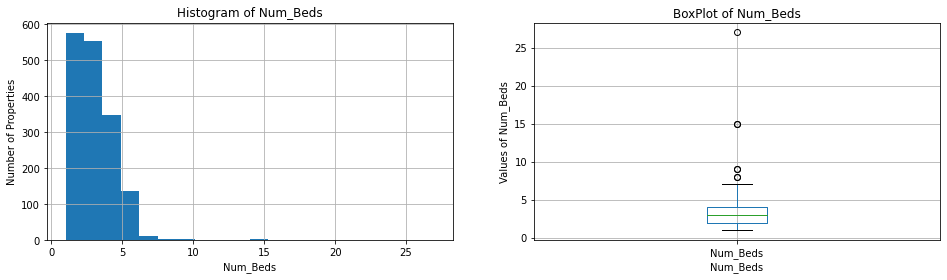

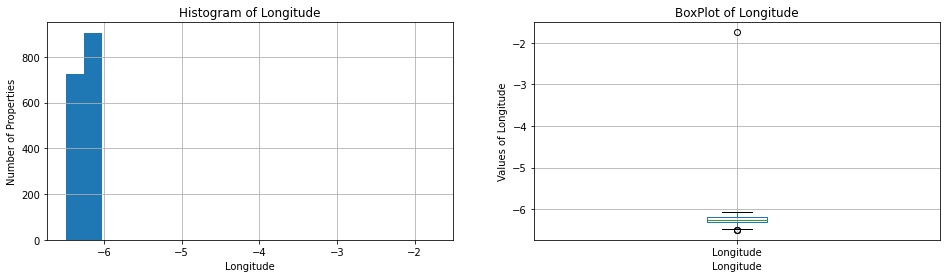

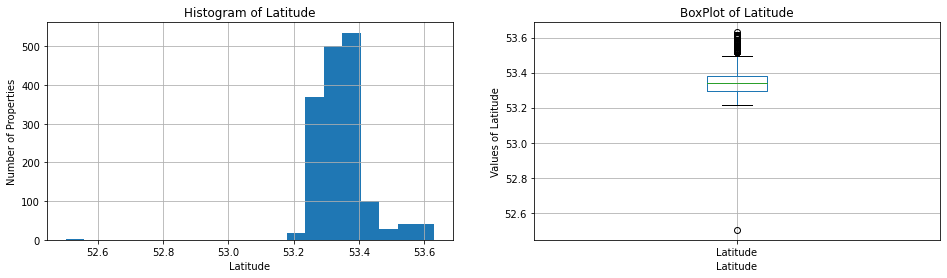

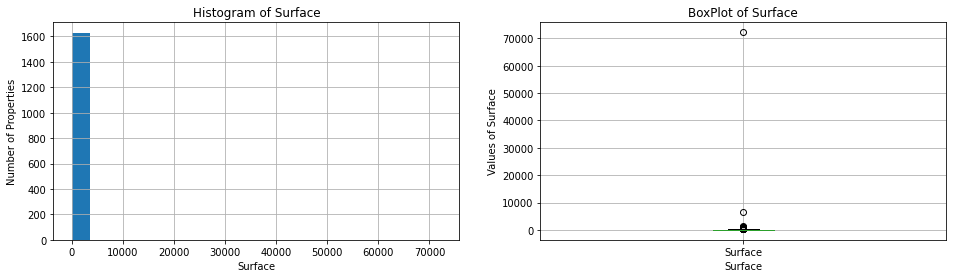

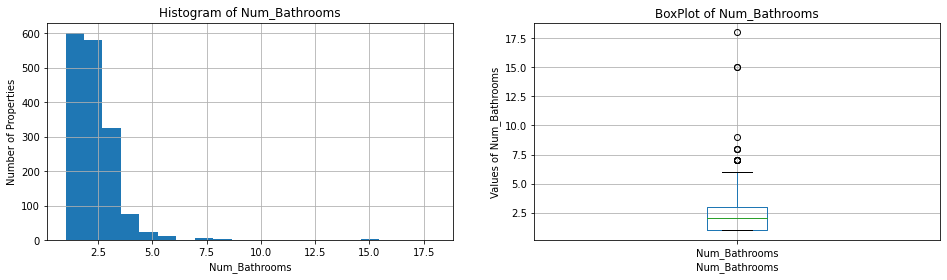

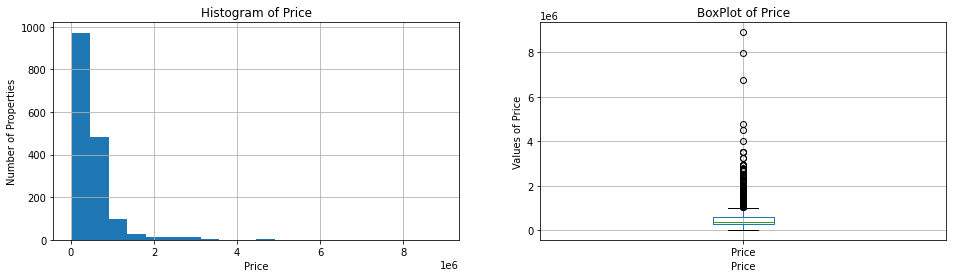

In [35]:
for sNumericalFeature in dCategoricalAndNumericalFeatures['numerical']:
  plotHistogramAndBoxPlot(dftrain,sNumericalFeature)

In [36]:
def findOutliers(df):
  """Given a Pandas dataframe, 'df', print an an analyis which shows the number of outliers in each column
     This will print the number of outliers above the inter-quartile range and the number of outliers below the inter-quartile range"""

# Find outliers.
# 1.  Calculate interquartile range

  dfQ1 = df.quantile(0.25)
  dfQ3 = df.quantile(0.75)
  dfIQR = dfQ3 - dfQ1
# Anything which is more than 1.5 times the inter-quartile range below the first quartile or
# above the third quartile is an outlier
  dfLowerOutlier = (dfQ1 - (1.5 * dfIQR))
  dfUpperOutlier = (dfQ3 + (1.5 * dfIQR))
  bIsOutlier = ((df < (dfQ1  - (1.5 * dfIQR))) | (df > (dfQ3 + (1.5 * dfIQR))))

  print("# Outliers in dataset")
  print(((df < (dfQ1 - 1.5 * dfIQR)) | (df > (dfQ3 + 1.5 * dfIQR))).sum())
  print("\n")
  print("# Outliers above the third quartile of the distribution")
  print((df > (dfQ3 + 1.5 * dfIQR)).sum())
  print("\n")
  print("# Outliers below the first quartile of the distribution")
  print((df < (dfQ1 - 1.5 * dfIQR)).sum())

In [37]:
findOutliers(dftrain)

# Outliers in dataset
BER_class          0
Description        0
Features           0
Latitude          83
Longitude          4
Num_Bathrooms     13
Num_Beds           7
Price            140
Surface          122
Type               0
dtype: int64


# Outliers above the third quartile of the distribution
BER_class          0
Description        0
Features           0
Latitude          82
Longitude          1
Num_Bathrooms     13
Num_Beds           7
Price            140
Surface          122
Type               0
dtype: int64


# Outliers below the first quartile of the distribution
BER_class        0
Description      0
Features         0
Latitude         1
Longitude        3
Num_Bathrooms    0
Num_Beds         0
Price            0
Surface          0
Type             0
dtype: int64


In [38]:
# Drop locations which are outside Dublin...from plots:  longitude > -6 W; latitude < 53N
dftrain[dftrain.Longitude > -6]

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
355,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,None,52.501856,-1.744995,semi-detached,79.0,199000


In [39]:
dftrain[dftrain.Latitude < 53]

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
355,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,None,52.501856,-1.744995,semi-detached,79.0,199000


In [40]:
dfIndexBadLongitude = dftrain[dftrain['Longitude'] > -6].index
dftrain.drop(dfIndexBadLongitude, inplace=True)

In [41]:
# There appears to be one example with a very large surface area
dftrain[dftrain.Surface > 10000]

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
506,1,4,E1,Thornton Park is a superb modern equestrian ce...,None,53.474502,-6.343483,bungalow,72236.38714,1100000


In [42]:
# Drop this (Equestrian Centre would explain the surface area, perhaps)
dfIndexSurfaceOutlier = dftrain[dftrain['Surface'] > 10000].index
dftrain.drop(dfIndexSurfaceOutlier, inplace=True)

In [43]:
# There should be few examples with more than 10 bedrooms and/or 10 bathrooms

dftrain[(dftrain["Num_Bathrooms"] > 10) | (dftrain["Num_Beds"] > 10)]

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
557,15,15,D1,umber 67 &amp; 69 Jamestown Road represent a f...,18 separate units\nTransport links including t...,53.335109,-6.331515,semi-detached,318.2,775000
1099,15,15,NaN,A truly unique stone built house of great qual...,Lift servicing all floors\nVenetian and gothic...,53.287504,-6.146605,detached,700.0,1500000
1378,18,27,NaN,The Grove is an imposing Victorian mansion bui...,Approx. 1 490 sq. m / 16 041 sq. ft. of accomm...,53.260955,-6.117266,detached,1490.0,4500000


In [44]:
# Drop These
dfIndexBedsBathroomsOutliers = dftrain[(dftrain["Num_Bathrooms"] > 10) | (dftrain["Num_Beds"] > 10)].index
dftrain.drop(dfIndexBedsBathroomsOutliers, inplace=True)

In [45]:
# One-hot-encode the 'Type' feature
dftrain = pd.get_dummies(dftrain, columns=['Type'])
dftest = pd.get_dummies(dftest, columns=['Type'])

In [46]:
# Deal with 'BER_class'
dftest['BER_class'].value_counts()

D1                     72
C3                     70
D2                     68
C2                     65
C1                     49
E2                     47
F                      46
E1                     44
G                      41
B3                     28
B2                     21
A3                     20
SINo666of2006exempt     8
A2                      8
B1                      7
Name: BER_class, dtype: int64

In [47]:
dBERClassificationMap = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
    "SINo666of2006exempt" : 16
}
dftrain['BER_class'] = dftrain['BER_class'].replace(dBERClassificationMap)
dftest['BER_class'] = dftest['BER_class'].replace(dBERClassificationMap)

In [48]:
dftrain['BER_class'].mean()

9.901306240928882

In [49]:
dftest['BER_class'].mean()

9.872053872053872

In [50]:
# Replace 'N/A' values in ber_classification with mean, which is approx 10, i.e D1
dftrain['BER_class'].fillna(10, inplace=True)
dftest['BER_class'].fillna(10, inplace=True)

In [51]:
# Scale numerical data
oStandardScaler = StandardScaler()
dftrain[['Latitude', 'Longitude', 'BER_class']] = oStandardScaler.fit_transform(dftrain[['Latitude', 'Longitude', 'BER_class']])
dftest[['Latitude', 'Longitude', 'BER_class']] = oStandardScaler.fit_transform(dftest[['Latitude', 'Longitude', 'BER_class']])

In [52]:
# Log-transform 'beds', 'bathrooms', and 'surface'
dftrain['Num_Beds'] = np.log(dftrain['Num_Beds'])
dftest['Num_Beds'] = np.log(dftest['Num_Beds'])

dftrain['Num_Bathrooms'] = np.log(dftrain['Num_Bathrooms'])
dftest['Num_Bathrooms'] = np.log(dftest['Num_Bathrooms'])

dftrain['Surface'] = np.log(dftrain['Surface'])
dftest['Surface'] = np.log(dftest['Surface'])



In [53]:
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import string
# 'string.punctuation does not include the Euro symbol by default -> add it
string.punctuation = string.punctuation + '€¢'
lStopwords = stopwords.words('english')
lStoplist = lStopwords + list(string.punctuation)
stoplist = set(lStoplist)

In [55]:
# The 'translate_table' dictionary will be used to replace any character in the punctuation list with None, removing the character
translate_table = dict((ord(char), None) for char in string.punctuation)

def preprocess(sText, translate_table):
  """Preprocess text:  1.  Expand contractions (like "n't")
     2.  Remove punctuation
     3.  Tokenise any strings which are not in the stoplist and not digits
     4.  Convert to lower-case
     """
  sExpandedText = contractions.fix(sText)
  sNoPunctuationExpandedText=sExpandedText.translate(translate_table)
  return [sWord.lower() for sWord in word_tokenize(sNoPunctuationExpandedText) if sWord.lower() not in stoplist and not sWord.isdigit()]

In [56]:
#nltk.download('punkt')

In [57]:
dftrain['TokenisedDescription'] = dftrain['Description'].apply(preprocess,translate_table=translate_table)
dftrain['TokenisedFeatures'] = dftrain['Features'].apply(preprocess,translate_table=translate_table)

In [58]:
dftest['TokenisedDescription'] = dftest['Description'].apply(preprocess, translate_table=translate_table)
dftest['TokenisedFeatures'] = dftest['Features'].apply(preprocess, translate_table=translate_table)

In [59]:
dftrain.head()

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Surface,Price,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,TokenisedDescription,TokenisedFeatures
0,0.693147,0.693147,-0.320278,DNG are delighted to present to the market no....,None,0.637691,-1.966484,4.204693,195000,1,0,0,0,0,0,0,0,0,0,"[dng, delighted, present, market, chipping, ro...",[none]
1,0.000000,0.693147,0.029233,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,0.093810,0.200678,4.564036,425000,0,0,0,0,0,0,0,0,1,0,"[northbrook, terrace, charming, red, brick, pe...","[bight, spacious, interior, numerous, original..."
2,1.098612,1.098612,-2.417345,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,-1.153567,0.385888,4.672829,535000,0,0,0,0,0,1,0,0,0,0,"[welcome, cotter, close, immaculately, present...","[special, features, large, rear, garden, gener..."
3,0.000000,1.098612,0.728256,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,-1.220544,0.996066,4.394449,499000,0,0,1,0,0,0,0,0,0,0,"[welcome, sycamore, walk, enjoying, premier, a...","[wonderful, bed, detached, bungalow, accommoda..."
4,1.098612,1.386294,0.029233,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,2.757522,1.489615,5.030438,510000,0,0,1,0,0,0,0,0,0,0,"[four, seasons, comes, market, wonderful, oppo...","[detached, property, double, glazed, windows, ..."


In [60]:
dftest.head()

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Surface,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_terraced,Type_townhouse,TokenisedDescription,TokenisedFeatures
0,0.693147,0.693147,-0.636264,OMD Estate Agents are delighted to present thi...,Designated parking spaces\nPresented in pristi...,-0.461553,0.098135,4.174387,0,0,0,0,0,0,0,0,1,"[omd, estate, agents, delighted, present, bed,...","[designated, parking, spaces, presented, prist..."
1,0.693147,1.609438,0.709199,Welcome to Saint Anthony No.214 Glasnevin Aven...,Modern Worcester Gas Boiler\nSingle Glazed Win...,0.545850,-0.322679,4.955827,0,0,0,0,0,1,0,0,0,"[welcome, saint, anthony, no214, glasnevin, av...","[modern, worcester, gas, boiler, single, glaze..."
2,0.000000,0.693147,1.718296,"Located in this ever popular road, on grounds ...",2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,-1.053595,1.568898,4.382027,0,0,1,0,0,0,0,0,0,"[located, ever, popular, road, grounds, approx...","[bedroom, detached, house, 15th, acre, oil, fi..."
3,1.386294,1.386294,-2.654458,DNG are delighted to represent the sale of thi...,Detached House\nSouth Facing Garden\nOff Stree...,0.358743,0.731972,5.342334,0,0,1,0,0,0,0,0,0,"[dng, delighted, represent, sale, impeccable, ...","[detached, house, south, facing, garden, stree..."
4,0.693147,1.098612,1.381930,A unique opportunity to acquire this red brick...,Red brick end of terrace property \nC. 108sqm ...,-0.313630,-0.617473,4.682131,0,0,0,0,1,0,0,0,0,"[unique, opportunity, acquire, red, brick, bed...","[red, brick, end, terrace, property, c, 108sqm..."


**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

In [61]:
from nltk.stem import WordNetLemmatizer

In [62]:
oLemmatizerObj = WordNetLemmatizer()

In [63]:
def lemmatise(lListOfTokens,lemmatizerObj):
  """Apply Lemmatizer to a list of tokens"""
  lReturn = [lemmatizerObj.lemmatize(sWord) for sWord in lListOfTokens]
  return lReturn


In [64]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Your comments, explanation, and references here.

In [65]:
dftrain['LemmatizedDescription'] = dftrain['TokenisedDescription'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)

In [66]:
dftest['LemmatizedDescription'] = dftest['TokenisedDescription'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)

In [67]:
dftrain['LemmatizedFeatures'] = dftrain['TokenisedFeatures'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)
dftest['LemmatizedFeatures'] = dftest['TokenisedFeatures'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)

In [68]:
# TO-DO: identify most common bi-grams and tri-grams in the text data; remove any which convey no useful information
# TO-DO: filter meaningless estate-agent-speak; common acronyms etc

In [69]:
# Let's see if we can build a model using text features only.
# Create new dataframes with 'LemmatizedDescription' and 'LemmatizedFeatures'

# 
dfNewTrain=dftrain[['LemmatizedDescription','LemmatizedFeatures']].copy()
dfNewTest=dftrain[['Price']].copy()

In [70]:
dfNewTrain['LemmatizedDescription'] = dfNewTrain['LemmatizedDescription'].str.join(' ')

In [71]:
dfNewTrain['LemmatizedFeatures'] = dfNewTrain['LemmatizedFeatures'].str.join(' ')

In [72]:
dfNewTrain['TextFeatures'] = dfNewTrain["LemmatizedDescription"] + dfNewTrain["LemmatizedFeatures"]


In [73]:
dfNewTrain.drop(['LemmatizedDescription', 'LemmatizedFeatures'], axis=1, inplace=True)


In [74]:
dfNewTrain.head()

,TextFeatures
0,dng delighted present market chipping row two ...
1,northbrook terrace charming red brick period h...
2,welcome cotter close immaculately presented th...
3,welcome sycamore walk enjoying premier address...
4,four season come market wonderful opportunity ...


In [75]:
# Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(dfNewTrain['TextFeatures'], dfNewTest, test_size=0.3, random_state=42)

In [76]:
X_train

835     view saturday 7th march 12001230pm register fl...
1281    frank fleming quillsen glasnevin delighted pre...
341     charming storey mew style home wealth attracti...
581     viewing appointment torca view cottagestyle ho...
147     beautifully kept extended family home great lo...
                              ...                        
1139    sherry fitzgerald pleased present market moss ...
1303    ber detail follow mcguirk beggan delighted pre...
867     new market deceptively spacious stylish bedroo...
1469    smith amp butler estate delighted bring market...
1135    please note property view saturday 7th march 1...
Name: TextFeatures, Length: 1138, dtype: object

In [77]:
oCountVectorizer = CountVectorizer(stop_words='english')

In [78]:
oVectoredTrainFeatures = oCountVectorizer.fit_transform(X_train)

In [79]:
oVectoredTestFeatures = oCountVectorizer.transform(X_test)

In [80]:
# Get the first 10 features
print(oCountVectorizer.get_feature_names()[:10])

['008m', '0138a', '013ha', '024ha', '028ha07ac', '03acre', '045m', '04acres', '052m', '055m']


In [81]:
from sklearn.linear_model import Lasso

In [82]:
oLinReg = Lasso(alpha=0.1)


In [83]:
oLinReg.fit(oVectoredTrainFeatures, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
pred = oLinReg.predict(oVectoredTestFeatures)

In [85]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def calculateMAPE(y_true, y_pred):
  """Calculate Mean Absolute Percentage Error, given two numPy arrays: y_true, containing the correct values,
  and y_pred, containing the predicted values.  Returns a floating-point number"""
  npYtrue, npYpred = np.array(y_true), np.array(y_pred)
  fMAPE = np.mean(abs(npYpred - npYtrue)/npYtrue)
  return fMAPE

In [86]:

fMAE=mean_absolute_error(y_test,pred)
fRMSE=mean_squared_error(y_test,pred,squared=False)
fMAPE=calculateMAPE(y_test,pred)

In [87]:
print("Mean Absolute Error (MAE): {}".format(fMAE))
print("Root Mean Squared Error (RMSE): {}".format(fRMSE))
print("Mean Absolute Percentage Error (MAPE): {}".format(fMAPE))

Mean Absolute Error (MAE): 327538.8753981097
Root Mean Squared Error (RMSE): 755392.6715209892
Mean Absolute Percentage Error (MAPE): 0.8276703306382356


TO-DO: 1. Further cleaning of text data (10 most important features look suspect)
2. Experiment with different regression models (e.g. SVM, Ridge)
3. Use GridSearchCV
4. Add back the features from EDA....regress with those; add text features, and see what adding the text features to the model adds to the accuracy.

# PIECEWISE REGRESSION

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [88]:
# your code here

# SUMMARY

Your summary here.